Full Name: Lê Minh Nhựt

Student ID: 22521060

**Experiment Requirements (for all datasets)**
- Train - test splitting ratio = 7:3.
- Random_state = 'Your Student ID'.
- Experiment with **Gradient Descent** (*max_iter = 200*, *learning_rate (eta)* is set by yourself) and **Normal Equation**.
- Visualize the cost trend (only for Gradient Descent)
- Evaluation Metric: **R2 score**.
- After completing all requirements, click on ‘Runtime’ and choose ‘Restart and run all’.
- If the code is run without any errors (and the results are the same as before re-running), download the .ipybn file and submit.
Otherwise, check the code carefully.


# Fish Dataset

🐟🐟 **Dataset Information (fish.csv)** 🐟🐟
- Weight: Weight of fish in gram
- Length1: Vertical length in cm
- Length2: Diagonal length in cm
- Length3: Cross length in cm
- Height: Height in cm
- Width: Diagonal width in cm

📚📚 **Problem Requirement** 📚📚

Use all remaining attributes to estimate the **weight** of fish.


**Note**: Try to make the Gradient Descent achieving the comparable performance to the Normal Equation model. ✌✌

**Hint**💡: Apply (suitable) techniques in Data Preprocessing tutorial file.

IMPORT LIBRARIES

In [1702]:
import gdown
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
train_test_split
import numpy as np
import matplotlib.pyplot as plt

DOWNLOAD DATASET ON GGDRIVE

In [1703]:
!gdown 1qkuVOOT3tm9gMVW_RRaC-KelDOaAO_TT

Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1qkuVOOT3tm9gMVW_RRaC-KelDOaAO_TT 



LOAD AND SHOW DATA

In [1704]:
filepath = '/content/fish.csv'
fish_data = pd.read_csv(filepath)
fish_data

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936
155,13.4,11.7,12.4,13.5,2.4300,1.2690
156,12.2,12.1,13.0,13.8,2.2770,1.2558
157,19.7,13.2,14.3,15.2,2.8728,2.0672


OUTLIERS

<Axes: xlabel='Weight'>

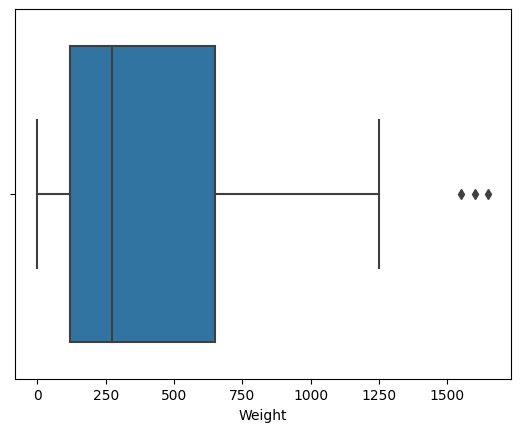

In [1705]:
import seaborn as sbn
sbn.boxplot(x = fish_data['Weight'])

In [1706]:
Q1 = fish_data['Weight'].quantile(0.25)
Q3 = fish_data['Weight'].quantile(0.75)
IQR = Q3 - Q1
low_fence = Q1 - (1.5 * IQR)
up_fence = Q3 + (1.5 * IQR)
outliers1 = fish_data[((fish_data['Weight'] < low_fence) | (fish_data['Weight'] > up_fence))]
fish_data = fish_data[~((fish_data['Weight'] < low_fence) | (fish_data['Weight'] > up_fence))]
fish_data

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936
155,13.4,11.7,12.4,13.5,2.4300,1.2690
156,12.2,12.1,13.0,13.8,2.2770,1.2558
157,19.7,13.2,14.3,15.2,2.8728,2.0672


<Axes: xlabel='Length1'>

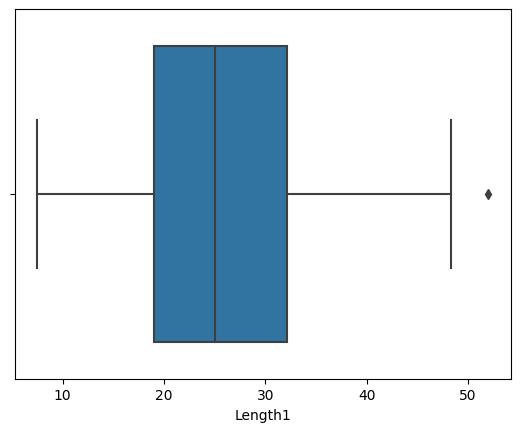

In [1707]:
sbn.boxplot(x = fish_data['Length1'])

In [1708]:
Q1 = fish_data['Length1'].quantile(0.25)
Q3 = fish_data['Length1'].quantile(0.75)
IQR = Q3 - Q1
low_fence = Q1 - (1.5 * IQR)
up_fence = Q3 + (1.5 * IQR)
outliers1 = fish_data[((fish_data['Length1'] < low_fence) | (fish_data['Length1'] > up_fence))]
fish_data = fish_data[~((fish_data['Length1'] < low_fence) | (fish_data['Length1'] > up_fence))]

STANDARDIZATION SCALER

In [1709]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
fish_data = scaler.fit_transform(fish_data)

SPLIT DATA: 70% TRAIN, 30% TEST

In [1710]:
from sklearn.model_selection import train_test_split
X = fish_data[:, 1 : ]
y = fish_data[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 22521060)

IMPLEMENT

In [1711]:
class LinearRegression_GD:
  def __init__ (self, eta = 0.001, max_iter = 200, random_state = 22521060):
    self.eta = eta
    self.max_iter = max_iter
    self.random_state = random_state
    self.w = None
    self.costs = [ ]

  def predict(self, X):
    return np.dot(X, self.w[1:]) + self.w[0]

  def fit(self, X, y):
    rgen = np.random.RandomState(self.random_state)
    self.w = rgen.normal(loc = 0.0, scale = 0.01, size = 1 + X.shape[1])
    self.costs = [ ]
    for n_iters in range(self.max_iter):
      y_pred = self.predict(X)
      diff = y - y_pred
      self.w[0] += self.eta * np.sum(diff)
      self.w[1:] += self.eta * np.dot(X.T, diff)
      cost = np.sum(diff ** 2) / 2
      self.costs.append(cost)
  # def fit(self, X, y):
  #   rgen = np.random.RandomState(self.random_state)
  #   self.w = rgen.normal(loc = 0.0, scale = 0.01, size = 1 + X.shape[1])
  #   self.costs = [ ]
  #   for n_iters in range(self.max_iter):
  #     y_pred = self.predict(X)
  #     diff = y - y_pred
  #     self.w[0] += self.eta * np.sum(diff)
  #     for j in range(X.shape[1]):
  #       delta = 0.0
  #       for i in range(X.shape[0]):
  #         delta += self.eta * diff[i] * X[i][j]
  #       self.w[j + 1] += delta
  #     cost = np.sum(diff ** 2) / 2
  #     self.costs.append(cost)

TRAIN MODEL

In [1712]:
reg_GD = LinearRegression_GD(eta = 0.001, max_iter = 200, random_state = 22521060)
reg_GD.fit(X_train, y_train)

Visualize the trend in the cost values (Gradient Descent)

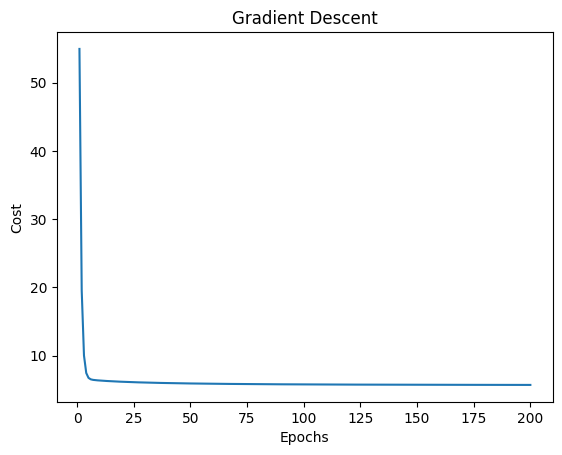

In [1713]:
plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

PERFORMANCE EVALUATION (GD)

In [1714]:
w_GD = reg_GD.w
w_GD
from sklearn.metrics import r2_score as R2
y_pred_GD = reg_GD.predict(X)

TRAIN MODEL (NE)

In [1715]:
from sklearn.linear_model import LinearRegression
reg_NE = LinearRegression()
reg_NE.fit(X_train, y_train)

LinearRegression()

PERFORMANCE EVALUATION (NE)

In [1716]:
w_NE = np.append(reg_NE.intercept_ , reg_NE.coef_)
w_NE
from sklearn.metrics import r2_score as R2
y_pred_NE = reg_NE.predict(X)

COMPARE PERFORMANCE OF GD AND NE

In [1717]:
print('R2 of GD:', round(R2(y, y_pred_GD), 6))
print('R2 of GD:', round(R2(y, y_pred_NE), 6))

R2 of GD: 0.895016
R2 of GD: 0.905925


# Insurance Dataset

💰💰 **Dataset Information (insurance.csv)** 💰💰
- age: Age of primary beneficiary
- sex: Insurance contractor gender, female / male
- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to
- children: Number of children covered by health insurance / Number of dependents
- smoker: Smoker / Non-smoker
- region: The beneficiary's residential area in the US, northeast, southeast, southwest, northwest
- charges: Individual medical costs billed by health insurance

📚📚 **Problem Requirement** 📚📚

Use all remaining attributes to estimate the individual medical costs billed by health insurance ('**charges**')


**Note**: Try to make the Gradient Descent achieving the comparable performance to the Normal Equation model. ✌✌

**Hint**💡: Apply (suitable) techniques in the Data Preprocessing tutorial file.

DOWNLOAD DATASET ON GGDRIVE

In [1718]:
!gdown 15GwGyPmZK1vZaSU39vBCqnCuSLj3ODlG

Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=15GwGyPmZK1vZaSU39vBCqnCuSLj3ODlG 



LOAD AND SHOW DATA

In [1719]:
folder_path = '/content/insurance.csv'
insurance_data = pd.read_csv(folder_path)
insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


SHOW OULIERS

<Axes: xlabel='charges'>

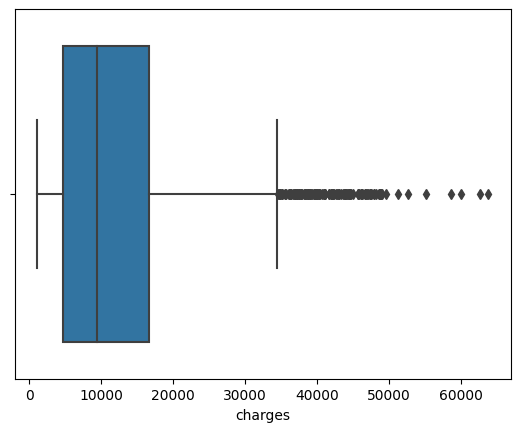

In [1720]:
sbn.boxplot(x = insurance_data['charges'])

LABEL ENCODING

In [1721]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
insurance_data['sex'] = label.fit_transform(insurance_data['sex'])
insurance_data['smoker'] = label.fit_transform(insurance_data['smoker'])
insurance_data['region'] = label.fit_transform(insurance_data['region'])
insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


STARDADIZATION SCALER

In [1722]:
scaler = StandardScaler()
insurance_data = scaler.fit_transform(insurance_data)

SLIPT DATA: 70% TRAIN, 30% TEST

In [1723]:
X = insurance_data[:, : -1]
y = insurance_data[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 22521060)

IMPLEMENT

In [1724]:
class LinearRegression_GD:
  def __init__ (self, eta = 0.0001, max_iter = 200, random_state = 22521060):
    self.eta = eta
    self.max_iter = max_iter
    self.random_state = random_state
    self.w = None
    self.costs = [ ]

  def predict(self, X):
    return np.dot(X, self.w[1:]) + self.w[0]

  def fit(self, X, y):
    rgen = np.random.RandomState(self.random_state)
    self.w = rgen.normal(loc = 0.0, scale = 0.01, size = 1 + X.shape[1])
    self.costs = [ ]
    for n_iters in range(self.max_iter):
      y_pred = self.predict(X)
      diff = y - y_pred
      self.w[0] += self.eta * np.sum(diff)
      self.w[1:] += self.eta * np.dot(X.T, diff)
      cost = np.sum(diff ** 2) / 2
      self.costs.append(cost)

TRAIN MODEL (GD)

In [1725]:
reg_GD = LinearRegression_GD(eta = 0.0001, max_iter = 200, random_state = 22521060)
reg_GD.fit(X_train, y_train)

Visualize the trend in the cost values (Gradient Descent)

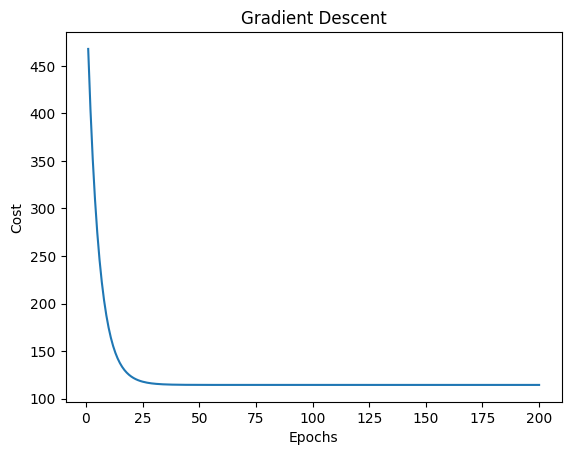

In [1726]:
plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

PERFORMANCE EVALUATION (GD)

In [1727]:
w_GD = reg_GD.w
w_GD
y_pred_GD = reg_GD.predict(X)

TRAIN MODEL (NE)

In [1728]:
reg_NE = LinearRegression()
reg_NE.fit(X_train, y_train)

LinearRegression()

PERFORMANACE EVALUATION (NE)

In [1729]:
w_NE = np.append(reg_NE.intercept_ , reg_NE.coef_)
w_NE
y_pred_NE = reg_NE.predict(X)

COMPARE PERFORMANCE OF GD AND NE

In [1730]:
print('R2 of GD:', round(R2(y, y_pred_GD), 6))
print('R2 of NE:', round(R2(y, y_pred_NE), 6))

R2 of GD: 0.750094
R2 of NE: 0.750094


# Tesla Stock Dataset

📈📈 **Dataset Information (tesla_stock.csv)** 📈📈
- Open: The opening price of the stock
- High: The high price of that day
- Low: The low price of that day
- Close: The closed price of that day
- Volume: The amount of stocks traded during that day

📚📚 **Problem Requirement** 📚📚

Use all remaining attributes to predict the closing price of tesla stock ('**Close**')


**Note**: Try to make the Gradient Descent achieving the comparable performance to the Normal Equation model. ✌✌

**Hint**💡: Apply (suitable) techniques in the Data Preprocessing tutorial file.

DOWNLOAD DATASET ON GGDRIVE

In [1731]:
!gdown 1Ok9fu-2AhLVNmEXq-XGqOkj1Nlr147Zd

Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1Ok9fu-2AhLVNmEXq-XGqOkj1Nlr147Zd 



LOAD AND SHOW DATA

In [1732]:
folder_path = '/content/tesla_stock.csv'
tesla_stock_data = pd.read_csv(folder_path)
tesla_stock_data

,Open,High,Low,Close,Volume
0,19.000000,25.000000,17.540001,23.889999,18766300
1,25.790001,30.420000,23.299999,23.830000,17187100
2,25.000000,25.920000,20.270000,21.959999,8218800
3,23.000000,23.100000,18.709999,19.200001,5139800
4,20.000000,20.000000,15.830000,16.110001,6866900
...,...,...,...,...,...
2411,568.489990,576.809998,558.080017,566.900024,11788500
2412,575.690002,589.799988,567.429993,580.989990,17801500
2413,632.419983,650.880005,618.000000,640.809998,29005700
2414,640.000000,653.000000,632.520020,650.570007,15719300


OUTLIERS

<Axes: xlabel='Close'>

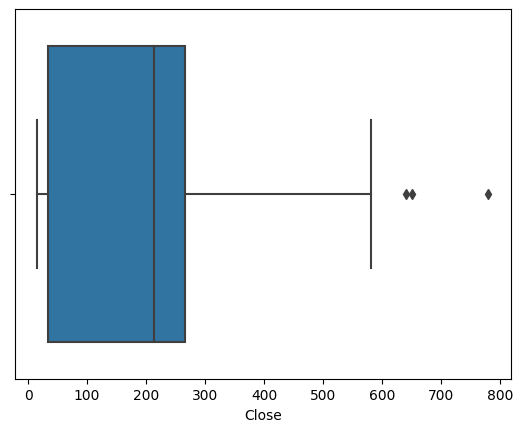

In [1733]:
sbn.boxplot(x = tesla_stock_data['Close'])

In [1734]:
Q1 = tesla_stock_data['Close'].quantile(0.25)
Q3 = tesla_stock_data['Close'].quantile(0.75)
IQR = Q3 - Q1
low_fence = Q1 - (1.5 * IQR)
up_fence = Q3 + (1.5 * IQR)
outliers1 = tesla_stock_data[((tesla_stock_data['Close'] < low_fence) | (tesla_stock_data['Close'] > up_fence))]
tesla_stock_data = tesla_stock_data[~((tesla_stock_data['Close'] < low_fence) | (tesla_stock_data['Close'] > up_fence))]
tesla_stock_data

,Open,High,Low,Close,Volume
0,19.000000,25.000000,17.540001,23.889999,18766300
1,25.790001,30.420000,23.299999,23.830000,17187100
2,25.000000,25.920000,20.270000,21.959999,8218800
3,23.000000,23.100000,18.709999,19.200001,5139800
4,20.000000,20.000000,15.830000,16.110001,6866900
...,...,...,...,...,...
2408,564.250000,582.000000,555.599976,572.200012,19651000
2409,570.630005,573.859985,554.260010,564.820007,14353600
2410,541.989990,564.440002,539.280029,558.020020,13608100
2411,568.489990,576.809998,558.080017,566.900024,11788500


<Axes: xlabel='Volume'>

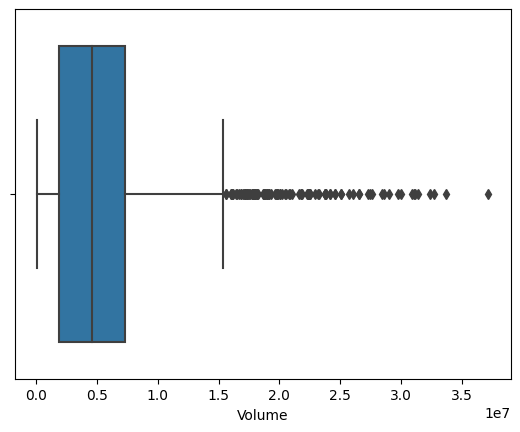

In [1735]:
sbn.boxplot(x = tesla_stock_data['Volume'])

In [1736]:
Q1 = tesla_stock_data['Volume'].quantile(0.25)
Q3 = tesla_stock_data['Volume'].quantile(0.75)
IQR = Q3 - Q1
low_fence = Q1 - (1.5 * IQR)
up_fence = Q3 + (1.5 * IQR)
outliers1 = tesla_stock_data[((tesla_stock_data['Volume'] < low_fence) | (tesla_stock_data['Volume'] > up_fence))]
tesla_stock_data = tesla_stock_data[~((tesla_stock_data['Volume'] < low_fence) | (tesla_stock_data['Volume'] > up_fence))]
tesla_stock_data

,Open,High,Low,Close,Volume
2,25.000000,25.920000,20.270000,21.959999,8218800
3,23.000000,23.100000,18.709999,19.200001,5139800
4,20.000000,20.000000,15.830000,16.110001,6866900
5,16.400000,16.629999,14.980000,15.800000,6921700
6,16.139999,17.520000,15.570000,17.459999,7711400
...,...,...,...,...,...
2400,481.790009,484.940002,473.700012,478.149994,12959500
2405,507.609985,515.669983,503.160004,510.500000,13629100
2409,570.630005,573.859985,554.260010,564.820007,14353600
2410,541.989990,564.440002,539.280029,558.020020,13608100


STANDARDIZATION SCALER

In [1737]:
scaler = StandardScaler()
tesla_stock_data = scaler.fit_transform(tesla_stock_data)
tesla_stock_data

array([[-1.35397031, -1.35188617, -1.38892595, -1.37958582,  1.00077408],
       [-1.37117822, -1.37579571, -1.4025558 , -1.40331618,  0.09888074],
       [-1.39699009, -1.40207924, -1.42771857, -1.42988388,  0.60477876],
       ...,
       [ 3.34060651,  3.29385561,  3.2765857 ,  3.2879038 ,  2.79776507],
       [ 3.09418907,  3.21398773,  3.14570445,  3.22943777,  2.57939499],
       [ 3.32219392,  3.31886747,  3.30996139,  3.30578771,  2.0464021 ]])

SLIPT DATA: 70% TRAIN, 30% TEST

In [1738]:
X = np.delete(tesla_stock_data, 3, 1)
print(X)
y = tesla_stock_data[:, -2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 22521060)

[[-1.35397031 -1.35188617 -1.38892595  1.00077408]
 [-1.37117822 -1.37579571 -1.4025558   0.09888074]
 [-1.39699009 -1.40207924 -1.42771857  0.60477876]
 ...
 [ 3.34060651  3.29385561  3.2765857   2.79776507]
 [ 3.09418907  3.21398773  3.14570445  2.57939499]
 [ 3.32219392  3.31886747  3.30996139  2.0464021 ]]


In [1739]:
class LinearRegression_GD:
  def __init__ (self, eta = 0.0003, max_iter = 200, random_state = 22521060):
    self.eta = eta
    self.max_iter = max_iter
    self.random_state = random_state
    self.w = None
    self.costs = [ ]

  def predict(self, X):
    return np.dot(X, self.w[1:]) + self.w[0]

  def fit(self, X, y):
    rgen = np.random.RandomState(self.random_state)
    self.w = rgen.normal(loc = 0.0, scale = 0.01, size = 1 + X.shape[1])
    self.costs = [ ]
    for n_iters in range(self.max_iter):
      y_pred = self.predict(X)
      diff = y - y_pred
      self.w[0] += self.eta * np.sum(diff)
      self.w[1:] += self.eta * np.dot(X.T, diff)
      cost = np.sum(diff ** 2) / 2
      self.costs.append(cost)

TRAIN MODEL (GD)

In [1740]:
reg_GD = LinearRegression_GD(eta = 0.0003, max_iter = 200, random_state = 22521060)
reg_GD.fit(X_train, y_train)

Visualize the trend in the cost values (Gradient Descent)

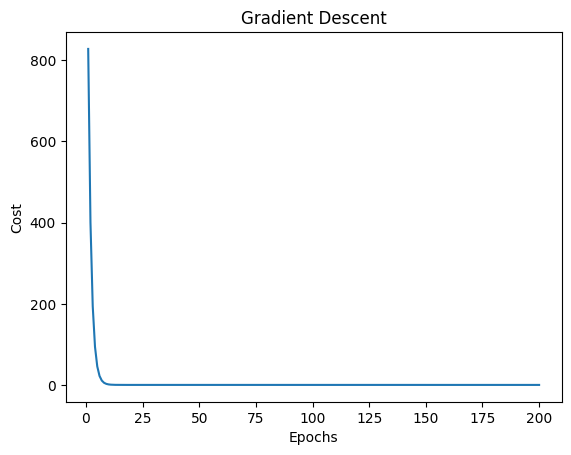

In [1741]:
plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

PERFORMANCE EVALUATION (GD)

In [1742]:
w_GD = reg_GD.w
w_GD
y_pred_GD = reg_GD.predict(X)

TRAIN MODEL (NE)

In [1743]:
reg_NE = LinearRegression()
reg_NE.fit(X_train, y_train)

LinearRegression()

PERFORMANCE EVALUATION (NE)

In [1744]:
w_NE = np.append(reg_NE.intercept_ , reg_NE.coef_)
w_NE
y_pred_NE = reg_NE.predict(X)

COMPARE PERFORMANCE OF GD AND NE

In [1745]:
print('R2 of GD:', round(R2(y, y_pred_GD), 6))
print('R2 of NE:', round(R2(y, y_pred_NE), 6))

R2 of GD: 0.999313
R2 of NE: 0.999733
